In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [ ]:
df = pd.read_csv('tictactoe_games.csv')
df = df.copy()
print("Размерность данных:", df.shape)
print("\nПропуски:")
print(df.isnull().sum())
print("\nДубликаты:")
print(df.duplicated().sum())
print("\nТипы данных:")
print(df.dtypes.value_counts())

Размерность данных: (255168, 10)

Пропуски:
Winner                0
Move 1-X (Row-Col)    0
Move 2-O (Row-Col)    0
Move 3-X (Row-Col)    0
Move 4-O (Row-Col)    0
Move 5-X (Row-Col)    0
Move 6-O (Row-Col)    0
Move 7-X (Row-Col)    0
Move 8-O (Row-Col)    0
Move 9-X (Row-Col)    0
dtype: int64

Дубликаты:
0

Типы данных:
object    10
Name: count, dtype: int64


In [3]:
df


,Winner,Move 1-X (Row-Col),Move 2-O (Row-Col),Move 3-X (Row-Col),Move 4-O (Row-Col),Move 5-X (Row-Col),Move 6-O (Row-Col),Move 7-X (Row-Col),Move 8-O (Row-Col),Move 9-X (Row-Col)
0,X,0-0,0-1,1-0,0-2,2-0,---,---,---,---
1,X,0-0,0-1,1-0,1-1,2-0,---,---,---,---
2,X,0-0,0-1,1-0,1-2,2-0,---,---,---,---
3,X,0-0,0-1,1-0,2-1,2-0,---,---,---,---
4,X,0-0,0-1,1-0,2-2,2-0,---,---,---,---
...,...,...,...,...,...,...,...,...,...,...
255163,X,2-2,2-1,2-0,1-2,1-1,0-2,0-1,1-0,0-0
255164,-,2-2,2-1,2-0,1-2,1-1,0-2,1-0,0-0,0-1
255165,X,2-2,2-1,2-0,1-2,1-1,0-2,1-0,0-1,0-0
255166,X,2-2,2-1,2-0,1-2,1-1,1-0,0-1,0-0,0-2


Делаем ходы красивыми

In [4]:
def parse_move(move_str):
    if pd.isna(move_str):
        return None
    try:
        row, col = map(int, move_str.split('-'))
        return (row, col)
    except:
        return None
    
move_columns = [col for col in df.columns if 'Move' in col]
for col in move_columns:
    df[col] = df[col].apply(parse_move)    

df

,Winner,Move 1-X (Row-Col),Move 2-O (Row-Col),Move 3-X (Row-Col),Move 4-O (Row-Col),Move 5-X (Row-Col),Move 6-O (Row-Col),Move 7-X (Row-Col),Move 8-O (Row-Col),Move 9-X (Row-Col)
0,X,"(0, 0)","(0, 1)","(1, 0)","(0, 2)","(2, 0)",None,None,None,None
1,X,"(0, 0)","(0, 1)","(1, 0)","(1, 1)","(2, 0)",None,None,None,None
2,X,"(0, 0)","(0, 1)","(1, 0)","(1, 2)","(2, 0)",None,None,None,None
3,X,"(0, 0)","(0, 1)","(1, 0)","(2, 1)","(2, 0)",None,None,None,None
4,X,"(0, 0)","(0, 1)","(1, 0)","(2, 2)","(2, 0)",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
255163,X,"(2, 2)","(2, 1)","(2, 0)","(1, 2)","(1, 1)","(0, 2)","(0, 1)","(1, 0)","(0, 0)"
255164,-,"(2, 2)","(2, 1)","(2, 0)","(1, 2)","(1, 1)","(0, 2)","(1, 0)","(0, 0)","(0, 1)"
255165,X,"(2, 2)","(2, 1)","(2, 0)","(1, 2)","(1, 1)","(0, 2)","(1, 0)","(0, 1)","(0, 0)"
255166,X,"(2, 2)","(2, 1)","(2, 0)","(1, 2)","(1, 1)","(1, 0)","(0, 1)","(0, 0)","(0, 2)"


Распределение побед

In [5]:
winner_stats = df['Winner'].value_counts()
print(f"Побед X: {winner_stats.get('X', 0)} ({winner_stats.get('X', 0)/len(df)*100:.1f}%)")
print(f"Побед O: {winner_stats.get('O', 0)} ({winner_stats.get('O', 0)/len(df)*100:.1f}%)")

def count_moves(row):
    moves = 0
    for col in move_columns:
        if row[col] is not None:
            moves += 1
    return moves

df['moves_count'] = df.apply(count_moves, axis=1)
move_counts = df['moves_count'].value_counts().sort_index()

print(f"\nДлина игр (количество ходов):")
for moves, count in move_counts.items():
    print(f"  {moves} ходов: {count} игр ({count/len(df)*100:.1f}%)")

Побед X: 131184 (51.4%)
Побед O: 77904 (30.5%)

Длина игр (количество ходов):
  5 ходов: 1440 игр (0.6%)
  6 ходов: 5328 игр (2.1%)
  7 ходов: 47952 игр (18.8%)
  8 ходов: 72576 игр (28.4%)
  9 ходов: 127872 игр (50.1%)


картинка

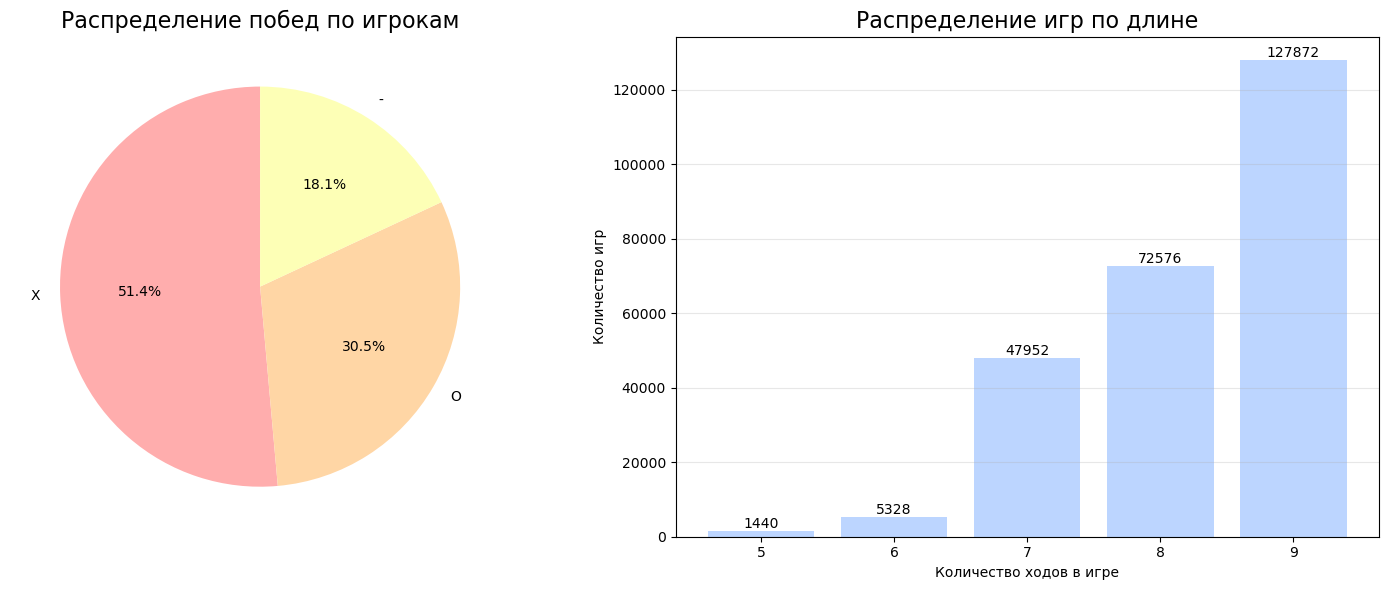

In [10]:
plt.style.use('default')
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

winner_counts = df['Winner'].value_counts()
colors = ['#ffadad', '#ffd6a5', '#fdffb6']
axes[0].pie(winner_counts.values, labels=winner_counts.index, autopct='%1.1f%%', 
           colors=colors, startangle=90)
axes[0].set_title('Распределение побед по игрокам', fontsize=16)

move_lengths = df['moves_count'].value_counts().sort_index()
axes[1].bar(move_lengths.index, move_lengths.values, color='#a0c4ff', alpha=0.7)
axes[1].set_xlabel('Количество ходов в игре')
axes[1].set_ylabel('Количество игр')
axes[1].set_title('Распределение игр по длине', fontsize=16)
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(move_lengths.values):
    axes[1].text(move_lengths.index[i], v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

анализ первых ходов

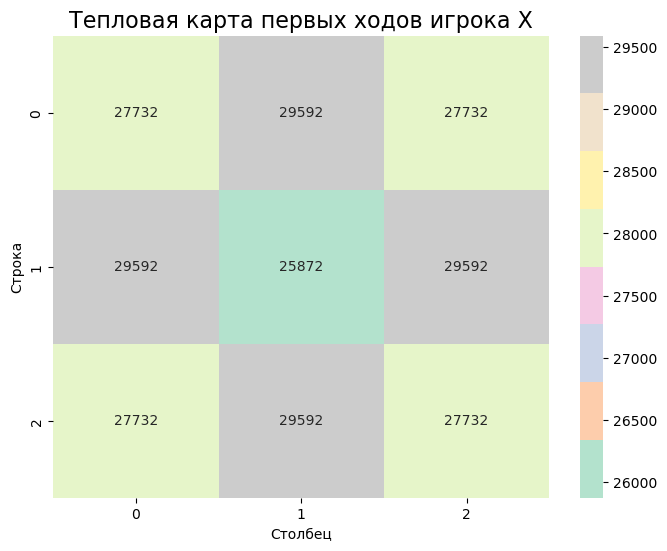

In [15]:
move_matrix = np.zeros((3, 3))

for move in df['Move 1-X (Row-Col)'].dropna():
    if move:
        row, col = move
        move_matrix[row][col] += 1

plt.figure(figsize=(8, 6))
sns.heatmap(move_matrix, annot=True, fmt='.0f', cmap='Pastel2', 
           xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('Тепловая карта первых ходов игрока X', fontsize=16)
plt.xlabel('Столбец')
plt.ylabel('Строка')
plt.show()